In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../csvs/customer_curn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.shape

(7043, 21)

In [5]:
df.drop("customerID" ,axis=1 , inplace=True)

In [6]:
pd.to_numeric(df.TotalCharges , errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df["TotalCharges"] = pd.to_numeric(df.TotalCharges , errors='coerce')

In [8]:
df = df[~pd.to_numeric(df.TotalCharges , errors='coerce').isnull()]

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [10]:
tenure_No = df[df["Churn"] == "No"].tenure
tenure_Yes = df[df["Churn"] == "Yes"].tenure

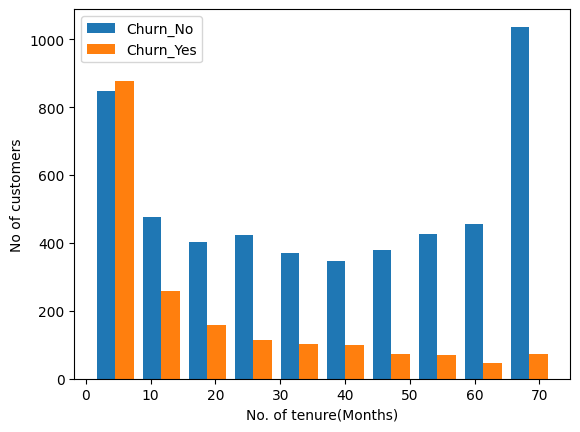

In [11]:
plt.hist([tenure_No , tenure_Yes] , label=["Churn_No" , "Churn_Yes"])
plt.legend()
plt.xlabel("No. of tenure(Months)")
plt.ylabel("No of customers")
plt.show()

In [12]:
TotalCharges_No = df[df["Churn"] == "No"].TotalCharges
TotalCharges_Yes = df[df["Churn"] == "Yes"].TotalCharges

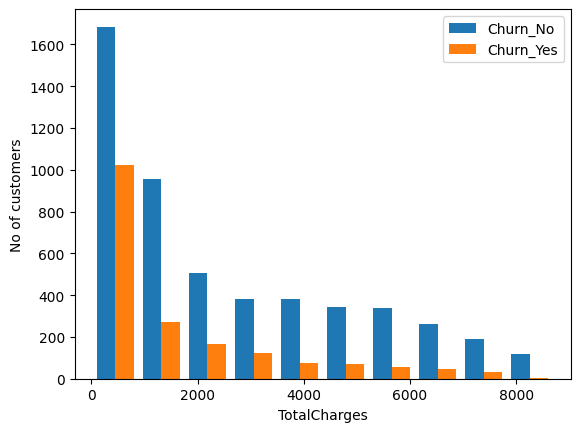

In [13]:
plt.hist([TotalCharges_No , TotalCharges_Yes] , label=["Churn_No" , "Churn_Yes"])
plt.legend()
plt.xlabel("TotalCharges")
plt.ylabel("No of customers")
plt.show()

In [14]:
MonthlyCharges_No = df[df["Churn"] == "No"].MonthlyCharges
MonthlyCharges_Yes = df[df["Churn"] == "Yes"].MonthlyCharges

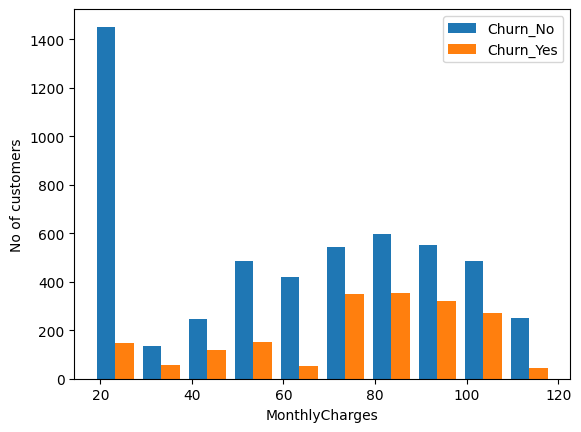

In [15]:
plt.hist([MonthlyCharges_No , MonthlyCharges_Yes] , label=["Churn_No" , "Churn_Yes"])
plt.legend()
plt.xlabel("MonthlyCharges")
plt.ylabel("No of customers")
plt.show()

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
df = df.replace(["No phone service" , "No phone service" , 'No internet service'] , "No" )

In [19]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
df = df.replace({"No" : 0 , "Yes" : 1} )

In [21]:
print_unique_col_values(df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
df = df.replace({"Female" : 0 , "Male" : 1} )

In [23]:
df.shape

(7032, 20)

In [24]:
df2 = pd.get_dummies(df , columns=["InternetService" ,"Contract" , "PaymentMethod"])

In [25]:
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1


In [26]:
df2.shape

(7032, 27)

In [27]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
for i in df2:
    print(f'{i}:{df2[i].unique()}')
    

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_0:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
obj = MinMaxScaler()
col = ["tenure" , "MonthlyCharges" ,"TotalCharges" ]

In [31]:
df2[col] = obj.fit_transform(df2[col])

In [32]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [33]:
df2.shape

(7032, 27)

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df2.drop("Churn" , axis=1) , df2["Churn"] , test_size=0.27)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
model = keras.Sequential([
    keras.layers.Dense(20 , input_shape = (26 , ) , activation="relu"),
    keras.layers.Dense(1 , activation="sigmoid"),
])
model.compile(optimizer="SGD" , loss="binary_crossentropy" , metrics=["accuracy"])


In [37]:
model.fit(X_train , y_train , epochs=50)

Epoch 1/50
161/161 [==============================] - 4s 6ms/step - loss: 0.5593 - accuracy: 0.7290
Epoch 2/50
161/161 [==============================] - 1s 5ms/step - loss: 0.5082 - accuracy: 0.7489
Epoch 3/50
161/161 [==============================] - 1s 7ms/step - loss: 0.4829 - accuracy: 0.7660
Epoch 4/50
161/161 [==============================] - 1s 5ms/step - loss: 0.4685 - accuracy: 0.7746
Epoch 5/50
161/161 [==============================] - 1s 5ms/step - loss: 0.4592 - accuracy: 0.7801
Epoch 6/50
161/161 [==============================] - 1s 6ms/step - loss: 0.4532 - accuracy: 0.7839
Epoch 7/50
161/161 [==============================] - 1s 5ms/step - loss: 0.4486 - accuracy: 0.7861
Epoch 8/50
161/161 [==============================] - 1s 6ms/step - loss: 0.4450 - accuracy: 0.7871
Epoch 9/50
161/161 [==============================] - 1s 6ms/step - loss: 0.4421 - accuracy: 0.7884
Epoch 10/50
161/161 [==============================] - 1s 5ms/step - loss: 0.4399 - accuracy: 0.7890

In [38]:
model.evaluate(X_test , y_test)

60/60 [==============================] - 1s 6ms/step - loss: 0.4074 - accuracy: 0.8025


[0.4074297547340393, 0.802527666091919]

In [39]:
y_predicted = model.predict(X_test)

60/60 [==============================] - 1s 6ms/step


In [40]:
y_predicted[:5]

array([[0.36662927],
       [0.39026773],
       [0.27821103],
       [0.47489828],
       [0.50478804]], dtype=float32)

In [41]:
y_predicted = [ 0 if i < 0.5  else 1 for i in y_predicted  ]

In [42]:
y_predicted[:5]

[0, 0, 0, 0, 1]

In [43]:
y_test[:5]

5469    0
2735    0
5295    0
1670    1
2365    0
Name: Churn, dtype: int64

In [44]:
from sklearn.metrics import classification_report , confusion_matrix

In [45]:
print(classification_report(y_test , y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1430
           1       0.61      0.55      0.58       469

    accuracy                           0.80      1899
   macro avg       0.73      0.72      0.72      1899
weighted avg       0.80      0.80      0.80      1899



In [46]:
ax = confusion_matrix(y_test , y_predicted)

In [47]:
import seaborn as sns

<AxesSubplot:>

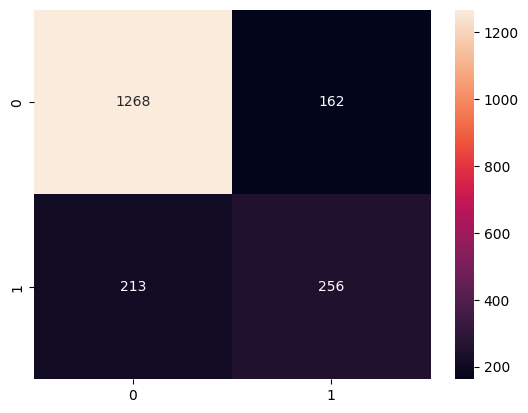

In [48]:
sns.heatmap(ax , annot=True , fmt="d")

In [49]:
X_train.shape

(5133, 26)

In [64]:
def return_y_predicted(X_train , y_train , X_test = X_test):
    # X_train = df.drop("Churn" , axis=1)
    # y_train = df["Churn"]
    model = keras.Sequential([
    keras.layers.Dense(20 , input_shape = (26 , ) , activation="relu"),
    keras.layers.Dense(1 , activation="sigmoid"),
    ])
    model.compile(optimizer="SGD" , loss="binary_crossentropy" , metrics=["accuracy"])
    model.fit(X_train , y_train , epochs=50)
    y_predicted = model.predict(X_test)
    return np.round(y_predicted)

In [52]:
temp = pd.concat([X_train , y_train] , axis=1)

In [67]:
temp_No = temp[temp["Churn"] == 0]
temp_Yes = temp[temp["Churn"] == 1]

In [68]:
temp_No.shape , temp_Yes.shape

((3733, 27), (1400, 27))

# oversampling (SMOTE)

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
obj = SMOTE(sampling_strategy="minority")

In [62]:
X_train_sm , y_train_sm = obj.fit_resample(X_train , y_train)

In [63]:
y_train_sm.value_counts()

0    3733
1    3733
Name: Churn, dtype: int64

In [65]:
y_pre_smote = return_y_predicted(X_train_sm , y_train_sm)

Epoch 1/50
234/234 [==============================] - 2s 6ms/step - loss: 0.6500 - accuracy: 0.6456
Epoch 2/50
234/234 [==============================] - 1s 6ms/step - loss: 0.5728 - accuracy: 0.7499
Epoch 3/50
234/234 [==============================] - 1s 6ms/step - loss: 0.5301 - accuracy: 0.7624
Epoch 4/50
234/234 [==============================] - 1s 5ms/step - loss: 0.5083 - accuracy: 0.7636
Epoch 5/50
234/234 [==============================] - 1s 6ms/step - loss: 0.4971 - accuracy: 0.7656
Epoch 6/50
234/234 [==============================] - 1s 5ms/step - loss: 0.4905 - accuracy: 0.7659
Epoch 7/50
234/234 [==============================] - 1s 6ms/step - loss: 0.4861 - accuracy: 0.7673
Epoch 8/50
234/234 [==============================] - 1s 6ms/step - loss: 0.4828 - accuracy: 0.7680
Epoch 9/50
234/234 [==============================] - 1s 5ms/step - loss: 0.4800 - accuracy: 0.7700
Epoch 10/50
234/234 [==============================] - 1s 6ms/step - loss: 0.4777 - accuracy: 0.7712

In [66]:
print(classification_report(y_test , y_pre_smote))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1430
           1       0.54      0.73      0.62       469

    accuracy                           0.78      1899
   macro avg       0.72      0.76      0.73      1899
weighted avg       0.81      0.78      0.79      1899



# ensembling

In [69]:
temp_No.shape , temp_Yes.shape

((3733, 27), (1400, 27))

In [75]:
temp1 = pd.concat([temp_No[:1400] , temp_Yes] , axis=0)
temp2 = pd.concat([temp_No[1400:2800] , temp_Yes] , axis=0)
temp3 = pd.concat([temp_No[2800:] , temp_Yes[:933]] , axis=0)

In [76]:
temp1["Churn"].value_counts() , temp2["Churn"].value_counts() , temp3["Churn"].value_counts() , 

(0    1400
 1    1400
 Name: Churn, dtype: int64,
 0    1400
 1    1400
 Name: Churn, dtype: int64,
 0    933
 1    933
 Name: Churn, dtype: int64)

In [77]:
x1 = temp1.drop("Churn" , axis=1)
x2 = temp2.drop("Churn" , axis=1)
x3 = temp3.drop("Churn" , axis=1)

In [78]:
y1 = temp1["Churn"]
y2 = temp2["Churn"]
y3 = temp3["Churn"]

In [79]:
yp1 = return_y_predicted(x1 , y1)
yp2 = return_y_predicted(x2 , y2)
yp3 = return_y_predicted(x3 , y3)

Epoch 1/50
88/88 [==============================] - 1s 6ms/step - loss: 0.7221 - accuracy: 0.4911
Epoch 2/50
88/88 [==============================] - 0s 5ms/step - loss: 0.6453 - accuracy: 0.6464
Epoch 3/50
88/88 [==============================] - 0s 5ms/step - loss: 0.6022 - accuracy: 0.7107
Epoch 4/50
88/88 [==============================] - 1s 6ms/step - loss: 0.5722 - accuracy: 0.7318
Epoch 5/50
88/88 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.7350
Epoch 6/50
88/88 [==============================] - 1s 6ms/step - loss: 0.5368 - accuracy: 0.7389
Epoch 7/50
88/88 [==============================] - 0s 6ms/step - loss: 0.5265 - accuracy: 0.7407
Epoch 8/50
88/88 [==============================] - 1s 7ms/step - loss: 0.5182 - accuracy: 0.7436
Epoch 9/50
88/88 [==============================] - 0s 5ms/step - loss: 0.5131 - accuracy: 0.7464
Epoch 10/50
88/88 [==============================] - 1s 6ms/step - loss: 0.5085 - accuracy: 0.7464
Epoch 11/50
88/88 [

In [81]:
len(yp3)

1899

In [82]:
final_y_pre = np.arange(len(yp3))

In [91]:
np.unique(yp1)

array([0., 1.], dtype=float32)

In [88]:
yp1[65] , yp2[65] , yp3[65] , final_y_pre[65]

(array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 1)

In [84]:
for i in range(len(yp3)):
    if ((yp1[i] + yp2[i] + yp3[i]) < 2):
        final_y_pre[i] = 0
    else:
        final_y_pre[i] = 1     

In [85]:
print(classification_report(y_test , final_y_pre))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1430
           1       0.50      0.82      0.62       469

    accuracy                           0.76      1899
   macro avg       0.71      0.78      0.72      1899
weighted avg       0.82      0.76      0.77      1899

